K-Means Clustering Result:
    ID  Age  Cluster
0   1   15        2
1   2   17        2
2   3   18        2
3   4   19        2
4   5   35        0
5   6   36        0
6   7   40        0
7   8   42        0
8   9   60        1
9  10   62        1


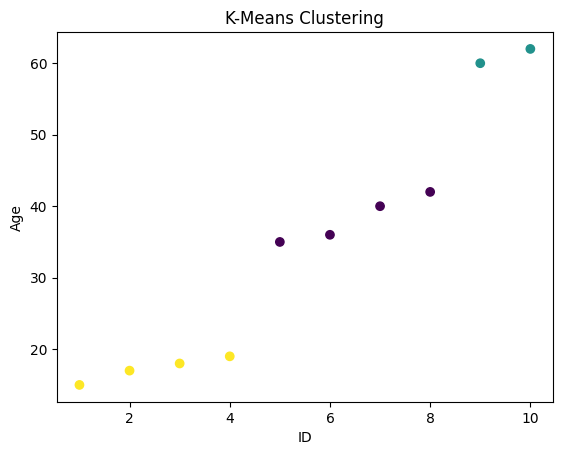

In [ ]:
# K-Means Clustering
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Sample dataset
data = {'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Age': [15, 17, 18, 19, 35, 36, 40, 42, 60, 62]}
df = pd.DataFrame(data)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[['Age']])

# Display results
print("K-Means Clustering Result:\n", df)

# Visualization
plt.scatter(df['ID'], df['Age'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('ID')
plt.ylabel('Age')
plt.show()


Hierarchical Clustering Result:
    ID  Age  Cluster
0   1   15        1
1   2   17        1
2   3   18        1
3   4   19        1
4   5   35        3
5   6   36        3
6   7   40        3
7   8   42        3
8   9   60        2
9  10   62        2


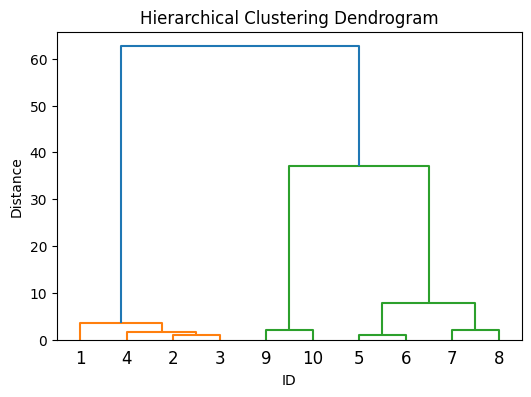

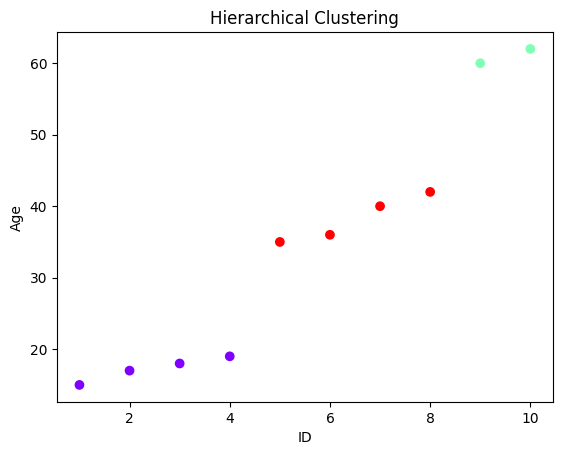

In [ ]:
# Hierarchical Clustering
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Sample dataset
data = {'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Age': [15, 17, 18, 19, 35, 36, 40, 42, 60, 62]}
df = pd.DataFrame(data)

# Perform Hierarchical Clustering
Z = linkage(df[['Age']], method='ward')
df['Cluster'] = fcluster(Z, t=3, criterion='maxclust')

# Display results
print("Hierarchical Clustering Result:\n", df)

# Dendrogram
plt.figure(figsize=(6, 4))
dendrogram(Z, labels=df['ID'].values)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('ID')
plt.ylabel('Distance')
plt.show()

# Scatter plot
plt.scatter(df['ID'], df['Age'], c=df['Cluster'], cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('ID')
plt.ylabel('Age')
plt.show()


In [ ]:
!pip install scikit-learn-extra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 15.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp312-cp312-linux_x86_64.whl size=2178142 sha256=1c15d9b9dc10c42ec9c0effe02e120bea2cba1fc19c7bb479a57b587c1346d9a
  Stored in directory: /root/.cache/pip/wheels/17/4d/c3/c6d5d563c1bf8146d059d63be3678abc2f2801fba0aaf5f0b8
Successfully built scikit-learn-extra


In [ ]:
# --- Apriori Association Rule Mining ---

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample dataset
data = {
    'Tid': [1, 2, 3, 4, 5],
    'Items': [
        ['Milk', 'Bread', 'Butter'],
        ['Bread', 'Eggs'],
        ['Milk', 'Bread', 'Eggs'],
        ['Milk', 'Butter'],
        ['Bread', 'Butter']
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Transaction Encoder
te = TransactionEncoder()
te_ary = te.fit(df['Items']).transform(df['Items'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori Algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.4, use_colnames=True)

# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print("=== Frequent Itemsets (Apriori) ===")
print(frequent_itemsets)
print("\n=== Association Rules (Apriori) ===")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


=== Frequent Itemsets (Apriori) ===
   support         itemsets
0      0.8          (Bread)
1      0.6         (Butter)
2      0.4           (Eggs)
3      0.6           (Milk)
4      0.4  (Butter, Bread)
5      0.4    (Eggs, Bread)
6      0.4    (Milk, Bread)
7      0.4   (Milk, Butter)

=== Association Rules (Apriori) ===
  antecedents consequents  support  confidence      lift
0      (Eggs)     (Bread)      0.4    1.000000  1.250000
1     (Bread)      (Eggs)      0.4    0.500000  1.250000
2      (Milk)    (Butter)      0.4    0.666667  1.111111
3    (Butter)      (Milk)      0.4    0.666667  1.111111


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
# --- FP-Growth Association Rule Mining ---

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Sample dataset
data = {
    'Tid': [1, 2, 3, 4, 5],
    'Items': [
        ['Milk', 'Bread', 'Butter'],
        ['Bread', 'Eggs'],
        ['Milk', 'Bread', 'Eggs'],
        ['Milk', 'Butter'],
        ['Bread', 'Butter']
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Transaction Encoder
te = TransactionEncoder()
te_ary = te.fit(df['Items']).transform(df['Items'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply FP-Growth Algorithm
frequent_itemsets = fpgrowth(df_encoded, min_support=0.4, use_colnames=True)

# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print("=== Frequent Itemsets (FP-Growth) ===")
print(frequent_itemsets)
print("\n=== Association Rules (FP-Growth) ===")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

=== Frequent Itemsets (FP-Growth) ===
   support         itemsets
0      0.8          (Bread)
1      0.6           (Milk)
2      0.6         (Butter)
3      0.4           (Eggs)
4      0.4    (Milk, Bread)
5      0.4   (Milk, Butter)
6      0.4  (Butter, Bread)
7      0.4    (Eggs, Bread)

=== Association Rules (FP-Growth) ===
  antecedents consequents  support  confidence      lift
0      (Milk)    (Butter)      0.4    0.666667  1.111111
1    (Butter)      (Milk)      0.4    0.666667  1.111111
2      (Eggs)     (Bread)      0.4    1.000000  1.250000
3     (Bread)      (Eggs)      0.4    0.500000  1.250000


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

=== Decision Tree Classifier ===
Accuracy: 66.67%


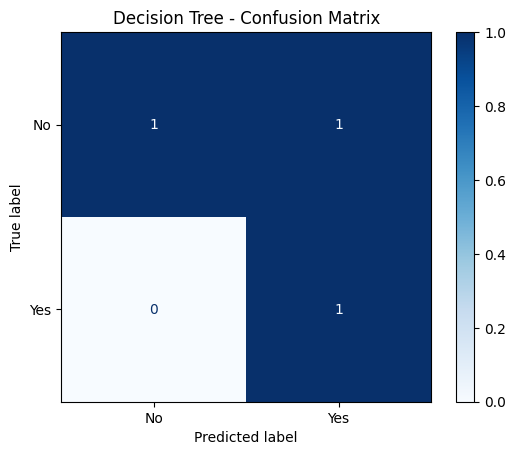

In [ ]:
#Decision Tree Classifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
d = {
    'Tid': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Hours_Studied':[2,4,6,8,1,9,5,3,7,4],
    'Attendance':[60,70,90,80,50,95,85,65,88,75],
    'Passed':['Yes','No','Yes','Yes','No','Yes','Yes','No','No','No']
}

data = pd.DataFrame(d)

# Separate features and target
X = data[["Hours_Studied", "Attendance"]]
y = data["Passed"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("=== Decision Tree Classifier ===")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree - Confusion Matrix")
plt.show()


=== Naive Bayes Classifier ===
Accuracy: 100.00%


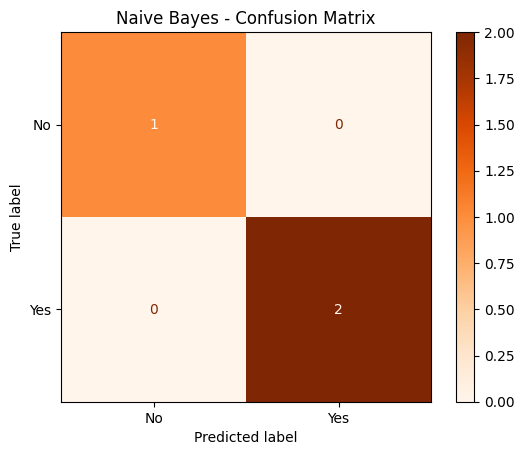

In [ ]:
#Naiye Bayes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
d = {
    'Tid': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Hours_Studied':[2,4,6,8,1,9,5,3,7,4],
    'Attendance':[60,70,90,80,50,95,85,65,88,75],
    'Passed':['Yes','No','Yes','Yes','No','Yes','Yes','No','Yes','No']
}

data = pd.DataFrame(d)

# Separate features and target
X = data[["Hours_Studied", "Attendance"]]
y = data["Passed"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("=== Naive Bayes Classifier ===")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Oranges)
plt.title("Naive Bayes - Confusion Matrix")
plt.show()
